In [3]:
import findspark
findspark.init()
findspark.find()

'C:\\spark-3.0.1-bin-hadoop2.7'

In [4]:
from pyspark.sql import SparkSession   #create a spark session to make DataFRame.
spark = SparkSession.builder.appName('pdm_data_spark_pipeline1').getOrCreate()

In [5]:
file_location = "D:\MTech_project\Datasets\pdm_miss.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","


In [6]:
# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type).option("inferSchema", infer_schema).option("header", first_row_is_header).option("sep", delimiter) \
                                 .option('nanValue',' ').option('nullValue',' ').load(file_location)

display(df)  #its like df.head() command.


DataFrame[UDI: int, Product ID: string, Type: string, Air temperature [K]: double, Process temperature [K]: double, Rotational speed [rpm]: int, Torque [Nm]: double, Tool wear [min]: int, Machine failure: int, TWF: int, HDF: int, PWF: int, OSF: int, RNF: int]

In [7]:
df.printSchema()
#its like .info() function.

root
 |-- UDI: integer (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Air temperature [K]: double (nullable = true)
 |-- Process temperature [K]: double (nullable = true)
 |-- Rotational speed [rpm]: integer (nullable = true)
 |-- Torque [Nm]: double (nullable = true)
 |-- Tool wear [min]: integer (nullable = true)
 |-- Machine failure: integer (nullable = true)
 |-- TWF: integer (nullable = true)
 |-- HDF: integer (nullable = true)
 |-- PWF: integer (nullable = true)
 |-- OSF: integer (nullable = true)
 |-- RNF: integer (nullable = true)



In [ ]:
#from pyspark.sql.types import StringType
#df = df.withColumn("Machine failure",df["Machine failure"].cast(StringType()))
#we can import 'DateType', 'IntegerType', etc. to change data type.

In [8]:
df.printSchema()
#its like .info() function.

root
 |-- UDI: integer (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Air temperature [K]: double (nullable = true)
 |-- Process temperature [K]: double (nullable = true)
 |-- Rotational speed [rpm]: integer (nullable = true)
 |-- Torque [Nm]: double (nullable = true)
 |-- Tool wear [min]: integer (nullable = true)
 |-- Machine failure: integer (nullable = true)
 |-- TWF: integer (nullable = true)
 |-- HDF: integer (nullable = true)
 |-- PWF: integer (nullable = true)
 |-- OSF: integer (nullable = true)
 |-- RNF: integer (nullable = true)



In [9]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()
#spark has lazy execution, need to give some action command to see the result. (like .show() in this case)
# 11 samples are null in 2nd last column.

+---+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+---------------+---+---+---+---+---+
|UDI|Product ID|Type|Air temperature [K]|Process temperature [K]|Rotational speed [rpm]|Torque [Nm]|Tool wear [min]|Machine failure|TWF|HDF|PWF|OSF|RNF|
+---+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+---------------+---+---+---+---+---+
|  0|         0| 215|                264|                    287|                  1033|       1154|           1132|              0|  4|  1|  0|  1|  1|
+---+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+---------------+---+---+---+---+---+



In [10]:
#convert spark DataFrame to Pandas DataFRame
pd_df = df.toPandas()
# we can convert spark df to pandas df if the data frame is not huge. As pandas will take all data into single node driver memory. (spark does it on distributed memory).

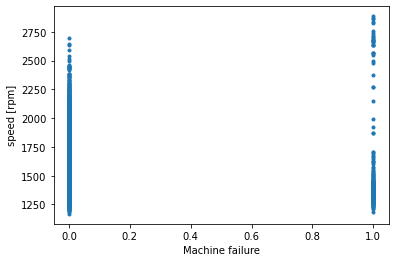

In [11]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['Machine failure'], pd_df['Rotational speed [rpm]'], '.')
plt.xlabel('Machine failure')
plt.ylabel('speed [rpm]')
display()

In [12]:
df.describe().show()

+-------+------------------+----------+----+-------------------+-----------------------+----------------------+-----------------+------------------+-----------------+--------------------+--------------------+-------------------+-------------------+--------------------+
|summary|               UDI|Product ID|Type|Air temperature [K]|Process temperature [K]|Rotational speed [rpm]|      Torque [Nm]|   Tool wear [min]|  Machine failure|                 TWF|                 HDF|                PWF|                OSF|                 RNF|
+-------+------------------+----------+----+-------------------+-----------------------+----------------------+-----------------+------------------+-----------------+--------------------+--------------------+-------------------+-------------------+--------------------+
|  count|             10000|     10000|9785|               9736|                   9713|                  8967|             8846|              8868|            10000|                9996|   

In [13]:
df.select("Air temperature [K]", "Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]","Machine failure").describe().show()

+-------+-------------------+-----------------------+----------------------+-----------------+------------------+-----------------+
|summary|Air temperature [K]|Process temperature [K]|Rotational speed [rpm]|      Torque [Nm]|   Tool wear [min]|  Machine failure|
+-------+-------------------+-----------------------+----------------------+-----------------+------------------+-----------------+
|  count|               9736|                   9713|                  8967|             8846|              8868|            10000|
|   mean|  300.0273007395219|      310.0021414598989|    1538.8703022192483|40.01415328962244|107.94440685611187|           0.0339|
| stddev| 2.0198130946151247|     1.5021838666413492|    179.86912614076903|9.989811814046403| 63.64268274647264|0.180980842650654|
|    min|              295.3|                  305.7|                  1168|              3.8|                 0|                0|
|    max|              304.5|                  313.8|                  2886|

In [14]:
df.columns

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [15]:
# create frequency table 
df.crosstab('Air temperature [K]', 'Process temperature [K]')

DataFrame[Air temperature [K]_Process temperature [K]: string, 305.7: bigint, 305.8: bigint, 305.9: bigint, 306.0: bigint, 306.1: bigint, 306.2: bigint, 306.3: bigint, 306.4: bigint, 306.5: bigint, 306.6: bigint, 306.7: bigint, 306.8: bigint, 306.9: bigint, 307.0: bigint, 307.1: bigint, 307.2: bigint, 307.3: bigint, 307.4: bigint, 307.5: bigint, 307.6: bigint, 307.7: bigint, 307.8: bigint, 307.9: bigint, 308.0: bigint, 308.1: bigint, 308.2: bigint, 308.3: bigint, 308.4: bigint, 308.5: bigint, 308.6: bigint, 308.7: bigint, 308.8: bigint, 308.9: bigint, 309.0: bigint, 309.1: bigint, 309.2: bigint, 309.3: bigint, 309.4: bigint, 309.5: bigint, 309.6: bigint, 309.7: bigint, 309.8: bigint, 309.9: bigint, 310.0: bigint, 310.1: bigint, 310.2: bigint, 310.3: bigint, 310.4: bigint, 310.5: bigint, 310.6: bigint, 310.7: bigint, 310.8: bigint, 310.9: bigint, 311.0: bigint, 311.1: bigint, 311.2: bigint, 311.3: bigint, 311.4: bigint, 311.5: bigint, 311.6: bigint, 311.7: bigint, 311.8: bigint, 311.9: 

In [16]:
# see relation between two columns
df.corr('Air temperature [K]', 'Process temperature [K]')

-0.019612534319816525

In [17]:
df.corr('Rotational speed [rpm]', 'Torque [Nm]')

-0.23780629526895056

In [18]:
# Some columns have no impact on output of the model, need to be removed.
#cols=['UDI', 'Product ID','TWF', 'HDF', 'PWF', 'OSF','RNF'] columns to be removed.
df.drop('UDI', 'Product ID','TWF', 'HDF', 'PWF', 'OSF','RNF')

DataFrame[Type: string, Air temperature [K]: double, Process temperature [K]: double, Rotational speed [rpm]: int, Torque [Nm]: double, Tool wear [min]: int, Machine failure: int]

In [19]:

df.columns

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [20]:
df = df.drop('UDI', 'Product ID','TWF', 'HDF', 'PWF', 'OSF','RNF')

In [21]:

df.columns

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

In [22]:
df.groupBy('Machine failure').count().show()
# 339 times machine is failed

+---------------+-----+
|Machine failure|count|
+---------------+-----+
|              1|  339|
|              0| 9661|
+---------------+-----+



In [23]:
# we have data converted to the pandas since our data set is small we can convert it to pandas.
# i want put some graph usin seaborn library.
import seaborn as sns
import pandas as pd

col_0,count
Type,
H,985
L,5879
M,2921


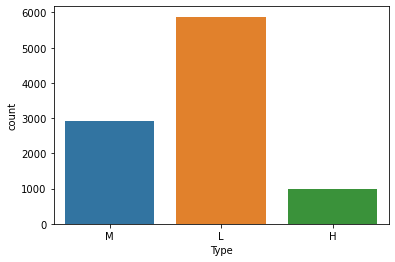

In [24]:
#counting the number of product according to the product quality.
sns.countplot(x='Type',data=pd_df)
pd.crosstab(pd_df['Type'], columns='count')

Machine failure,0,1
Type,,
H,964,21
L,5648,231
M,2840,81


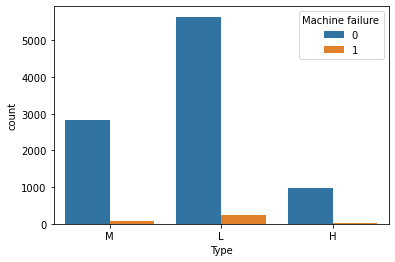

In [25]:
sns.countplot(x='Type',hue='Machine failure', data=pd_df) # more failure for low quality product.
pd.crosstab(pd_df['Type'], columns=pd_df['Machine failure'])

col_0,count
Machine failure,
0,9661
1,339


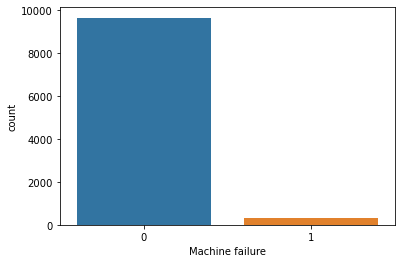

In [26]:
# counting machine failures. already calculated using group by command.
sns.countplot(pd_df['Machine failure'])
pd.crosstab(pd_df['Machine failure'], columns='count')

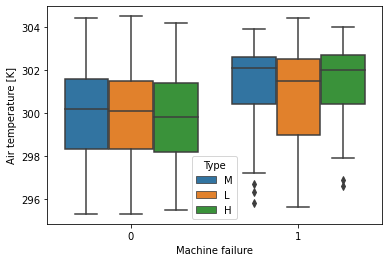

In [27]:
# lets see failure and temperature relation.
sns.boxplot(x='Machine failure',y='Air temperature [K]',hue='Type', data=pd_df) # No major impact

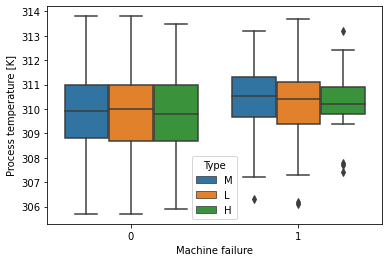

In [28]:
sns.boxplot(x='Machine failure',y='Process temperature [K]',hue='Type', data=pd_df)  # No major impact 

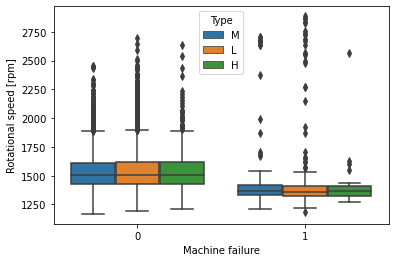

In [29]:
# Relation between failure and speed of rotation 
sns.boxplot(x='Machine failure',y='Rotational speed [rpm]',hue='Type', data=pd_df) 
# we can see that there more outliers here and speed of rotation is less in failure comapred to non failire.

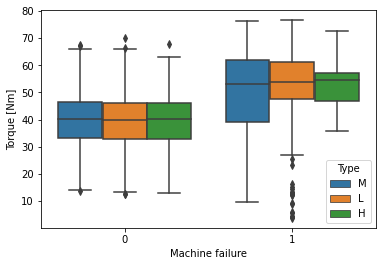

In [30]:
# Relation between machine failiure and torque
sns.boxplot(x='Machine failure',y='Torque [Nm]',hue='Type', data=pd_df)# little impact 
# Torque is same for non-failure and there variation in torque at the time of failure

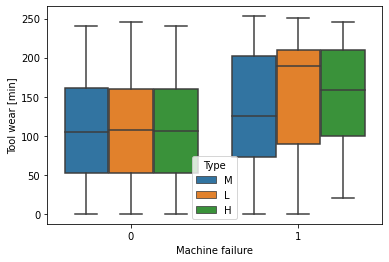

In [31]:
#There are little chances machien may fail beacuse of tool  wear.
sns.boxplot(x='Machine failure',y='Tool wear [min]',hue='Type', data=pd_df) # ''

In [32]:
df = df.drop('Type')

In [34]:
df.printSchema()

root
 |-- Air temperature [K]: double (nullable = true)
 |-- Process temperature [K]: double (nullable = true)
 |-- Rotational speed [rpm]: integer (nullable = true)
 |-- Torque [Nm]: double (nullable = true)
 |-- Tool wear [min]: integer (nullable = true)
 |-- Machine failure: integer (nullable = true)



In [35]:
#copy of dataframe 

fail_df = df 
(train_data, test_data) = fail_df.randomSplit([0.7, 0.3], 24) #24 is random_state
print("Records for Training: " +str(train_data.count()))
print("Records for Training: " +str(test_data.count()))

Records for Training: 6982
Records for Training: 3018


In [36]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

#catColumns =["Type"]

In [37]:
stages = []
#for catCol in catColumns:
#  stringIndexer = StringIndexer(inputCol=catCol, outputCol=catCol +"Index")
#  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[catCol +"catVec"])
#  stages +=[stringIndexer, encoder] 
# string values are converted to One not encoding 

In [38]:
stages

[]

In [39]:
# making list of numeric columns
numColumns = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']

In [40]:
# impute missing values.
from pyspark.ml.feature import Imputer
for numCol in numColumns:
  imputer = Imputer(inputCol=numCol, outputCol=numCol +"Index")
  stages+=[imputer]

In [41]:
# see the stages 
stages

[Imputer_66b9ccd74da7,
 Imputer_a232bfdb75f3,
 Imputer_83e9712521bb,
 Imputer_9baf60748c17,
 Imputer_61e57dd862ac]

In [42]:
# lets check the missing values in new DataFrame
fail_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for (c) in df.columns]).show()

+-------------------+-----------------------+----------------------+-----------+---------------+---------------+
|Air temperature [K]|Process temperature [K]|Rotational speed [rpm]|Torque [Nm]|Tool wear [min]|Machine failure|
+-------------------+-----------------------+----------------------+-----------+---------------+---------------+
|                264|                    287|                  1033|       1154|           1132|              0|
+-------------------+-----------------------+----------------------+-----------+---------------+---------------+



In [43]:
# put target column in stages
label_Idx = StringIndexer(inputCol="Machine failure", outputCol="label")

In [44]:
stages += [label_Idx]

In [45]:
stages

[Imputer_66b9ccd74da7,
 Imputer_a232bfdb75f3,
 Imputer_83e9712521bb,
 Imputer_9baf60748c17,
 Imputer_61e57dd862ac,
 StringIndexer_d3807178d9a5]

In [46]:
# just to see how data gets fit and transform  
temp = label_Idx.fit(train_data).transform(train_data)

In [47]:
temp.show(1)

+-------------------+-----------------------+----------------------+-----------+---------------+---------------+-----+
|Air temperature [K]|Process temperature [K]|Rotational speed [rpm]|Torque [Nm]|Tool wear [min]|Machine failure|label|
+-------------------+-----------------------+----------------------+-----------+---------------+---------------+-----+
|               null|                   null|                  1445|       42.9|             55|              0|  0.0|
+-------------------+-----------------------+----------------------+-----------+---------------+---------------+-----+
only showing top 1 row



In [48]:
# creating vector assembler, combine categorical columns and numeric columns
#assembleInputs = assemblerInputs = [c + "catVec" for c in catColumns] + [e + "Index" for e in numColumns]
#assembler = VectorAssembler(inputCols = assembleInputs, outputCol="features")
#stages += [assembler]

NameError: name 'catColumns' is not defined

In [49]:
# creating vector assembler, combine categorical columns and numeric columns
assembleInputs = assemblerInputs =  [e + "Index" for e in numColumns]
assembler = VectorAssembler(inputCols = assembleInputs, outputCol="features")
stages += [assembler]

In [50]:
stages

[Imputer_66b9ccd74da7,
 Imputer_a232bfdb75f3,
 Imputer_83e9712521bb,
 Imputer_9baf60748c17,
 Imputer_61e57dd862ac,
 StringIndexer_d3807178d9a5,
 VectorAssembler_bf5611d1d8fc]

In [51]:
# Now create pipeline
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)

In [52]:
#need to transform the training and testing data. train preperation data and test preperation data
trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [53]:
# to see how does dataset look like
trainprepDF.head(1)

[Row(Air temperature [K]=None, Process temperature [K]=None, Rotational speed [rpm]=1445, Torque [Nm]=42.9, Tool wear [min]=55, Machine failure=0, Air temperature [K]Index=300.0250147318775, Process temperature [K]Index=309.9899335793359, Rotational speed [rpm]Index=1445, Torque [Nm]Index=42.9, Tool wear [min]Index=55, label=0.0, features=DenseVector([300.025, 309.9899, 1445.0, 42.9, 55.0]))]

In [54]:
trainprepDF.select("Rotational speed [rpm]Index").show()

+---------------------------+
|Rotational speed [rpm]Index|
+---------------------------+
|                       1445|
|                       1471|
|                       1496|
|                       1526|
|                       1715|
|                       1855|
|                       1351|
|                       1392|
|                       1429|
|                       1444|
|                       1456|
|                       1518|
|                       1668|
|                       1668|
|                       1412|
|                       1420|
|                       1514|
|                       1516|
|                       1555|
|                       1859|
+---------------------------+
only showing top 20 rows



In [55]:
#create initial LogisticRegression model
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol = "label", featuresCol = "features", maxIter=10)

#Train model with training data.


In [56]:
lrModel = lr.fit(trainprepDF)

In [57]:
print("Coefficients: " +str(lrModel.coefficients))
print("Intercept: " +str(lrModel.intercept))

Coefficients: [0.005952428690862955,-0.005332066030133874,-0.00011021224581008065,0.00576127208087627,0.0005771841956402325]
Intercept: -3.4302472844584666


In [59]:
summary=lrModel.summary

In [60]:
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nAreaUnderROC: %s" %(accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall, summary.areaUnderROC))

Accuracy: 0.9686336293325695
FPR: 0.9686336293325695
TPR: 0.9686336293325695
F-measure: 0.9532003252348007
Precision: 0.9382511078739856
Recall: 0.9686336293325695
AreaUnderROC: 0.7877978282313717


In [61]:
display(lrModel, trainprepDF, "ROC")

LogisticRegressionModel: uid=LogisticRegression_775ce632377e, numClasses=2, numFeatures=5

DataFrame[Air temperature [K]: double, Process temperature [K]: double, Rotational speed [rpm]: int, Torque [Nm]: double, Tool wear [min]: int, Machine failure: int, Air temperature [K]Index: double, Process temperature [K]Index: double, Rotational speed [rpm]Index: int, Torque [Nm]Index: double, Tool wear [min]Index: int, label: double, features: vector]

'ROC'

In [62]:
display(lrModel, trainprepDF, "fittedVsResiduals") 

LogisticRegressionModel: uid=LogisticRegression_775ce632377e, numClasses=2, numFeatures=5

DataFrame[Air temperature [K]: double, Process temperature [K]: double, Rotational speed [rpm]: int, Torque [Nm]: double, Tool wear [min]: int, Machine failure: int, Air temperature [K]Index: double, Process temperature [K]Index: double, Rotational speed [rpm]Index: int, Torque [Nm]Index: double, Tool wear [min]Index: int, label: double, features: vector]

'fittedVsResiduals'

In [63]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrModel.transform(testprepDF)
evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol = "prediction")
area_under_curve = evaluatorLR.evaluate(predictions)

#default evaluation is areaUnderROC
print("areaUnderROC = %g" % area_under_curve)

evaluatorLR.getMetricName()

areaUnderROC = 0.5


'areaUnderROC'

In [64]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
results = predictions.select(['prediction', 'label'])

##prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0]), float(i[1])) for i in results_collect]
predictionAndLabels = sc.parallelize(results_list)

metrics = BinaryClassificationMetrics(predictionAndLabels)

#Area under Precision-recall curve

print("Area under PR = %s" % metrics.areaUnderPR)

#Area Under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

predictions.show(1)

NameError: name 'sc' is not defined

In [65]:
count = predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count

#precision = tp/(tp+fp)

recall = tp/(tp+fn)

print("correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" %(correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

correct: 2898
Wrong: 120
tp: 0
fp: 0
fn: 120
tn: 2898
Accuracy: 0.9602385685884692
Precision: 0.9382511078739856
Recall: 0.0


In [66]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
            .addGrid(lr.regParam, [0.01, 0.5,1.0])
             .addGrid(lr.elasticNetParam, [0.0,0.5,1.0])
             .addGrid(lr.maxIter, [5,10,20])
             .build())

In [67]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluatorLR, numFolds=5)

#Run cross validiations
cvModel = cv.fit(trainprepDF)

In [68]:
predictions = cvModel.bestModel.transform(testprepDF)

In [69]:
evaluatorLR.evaluate(predictions)

0.5

In [70]:
results = predictions.select(['prediction', 'label'])

count=predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()
accuracy = (tp+tn)/count

#precision = tp/(tp+fp)

print("correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" %(correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

correct: 2898
Wrong: 120
tp: 0
fp: 0
fn: 120
tn: 2898
Accuracy: 0.9602385685884692
Precision: 0.9382511078739856
Recall: 0.0


In [71]:
cvModel.explainParams()

"estimator: estimator to be cross-validated (current: LogisticRegression_775ce632377e)\nestimatorParamMaps: estimator param maps (current: [{Param(parent='LogisticRegression_775ce632377e', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_775ce632377e', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_775ce632377e', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_775ce632377e', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_775ce632377e', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_775ce632377e', name='maxIter', doc='max number of iterations

In [72]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="label", featuresCol="features").setImpurity("gini").setMaxDepth(6).setNumTrees(50).setFeatureSubsetStrategy("auto").setSeed(1010)

rfModel = rf.fit(trainprepDF)  


In [73]:
predictions = rfModel.transform(testprepDF)

In [74]:
results = predictions.select(['prediction', 'label'])

count=predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count

precision = tp/(tp+fp)

recall = tp/(tp+fn)

print("correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" %(correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))


correct: 2934
Wrong: 84
tp: 43
fp: 7
fn: 77
tn: 2891
Accuracy: 0.9721669980119284
Precision: 0.86
Recall: 0.35833333333333334


# End